In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [3]:
df = pd.read_csv('Social_Network_Ads.csv')

In [4]:
df.sample(5)

,Age,EstimatedSalary,Purchased
363,42,79000,0
296,42,73000,1
117,36,52000,0
79,26,17000,0
278,52,38000,1


In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(df.drop('Purchased', axis=1),
                                                    df['Purchased'],
                                                    test_size = 0.3,
                                                    random_state =0)
X_train.shape, X_test.shape

((280, 2), (120, 2))

In [13]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)   # here we calculation paremeter which we used to transform or scaling 

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [14]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [15]:
X_train_scaled

array([[-1.1631724 , -1.5849703 ],
       [ 2.17018137,  0.93098672],
       [ 0.0133054 ,  1.22017719],
       [ 0.20938504,  1.07558195],
       [ 0.40546467, -0.48604654],
       [-0.28081405, -0.31253226],
       [ 0.99370357, -0.8330751 ],
       [ 0.99370357,  1.8563962 ],
       [ 0.0133054 ,  1.24909623],
       [-0.86905295,  2.26126285],
       [-1.1631724 , -1.5849703 ],
       [ 2.17018137, -0.80415605],
       [-1.35925203, -1.46929411],
       [ 0.40546467,  2.2901819 ],
       [ 0.79762394,  0.75747245],
       [-0.96709276, -0.31253226],
       [ 0.11134522,  0.75747245],
       [-0.96709276,  0.55503912],
       [ 0.30742485,  0.06341534],
       [ 0.69958412, -1.26686079],
       [-0.47689368, -0.0233418 ],
       [-1.7514113 ,  0.3526058 ],
       [-0.67297331,  0.12125343],
       [ 0.40546467,  0.29476771],
       [-0.28081405,  0.06341534],
       [-0.47689368,  2.2901819 ],
       [ 0.20938504,  0.03449629],
       [ 1.28782302,  2.20342476],
       [ 0.79762394,

In [17]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns= X_test.columns)

In [18]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [21]:
np.round(X_train.describe(),1) # 1 stands for decimal value

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [23]:
 np.round(X_train_scaled.describe(), 1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


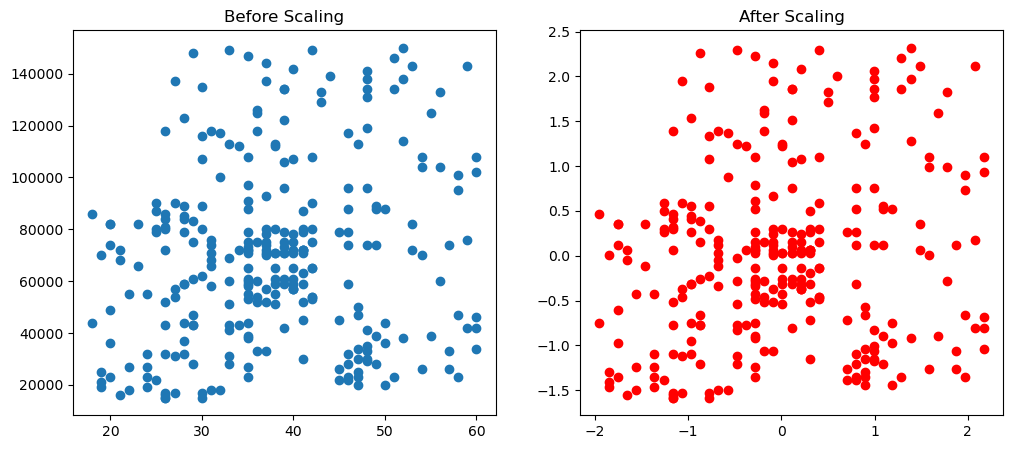

In [27]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

ax1.scatter(X_train["Age"], X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled["Age"], X_train_scaled["EstimatedSalary"], color = "red")
ax2.set_title('After Scaling')
plt.show()

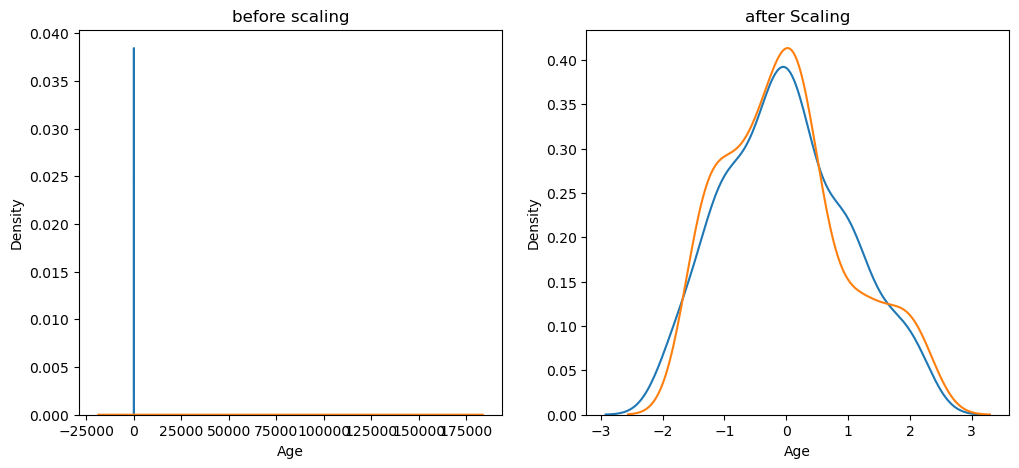

In [31]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12, 5))

ax1.set_title('before scaling')
sns.kdeplot(X_train['Age'], ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


ax2.set_title('after Scaling')
sns.kdeplot(X_train_scaled['Age'], ax=ax2)
sns.kdeplot(X_train_scaled["EstimatedSalary"], ax=ax2)
plt.show()

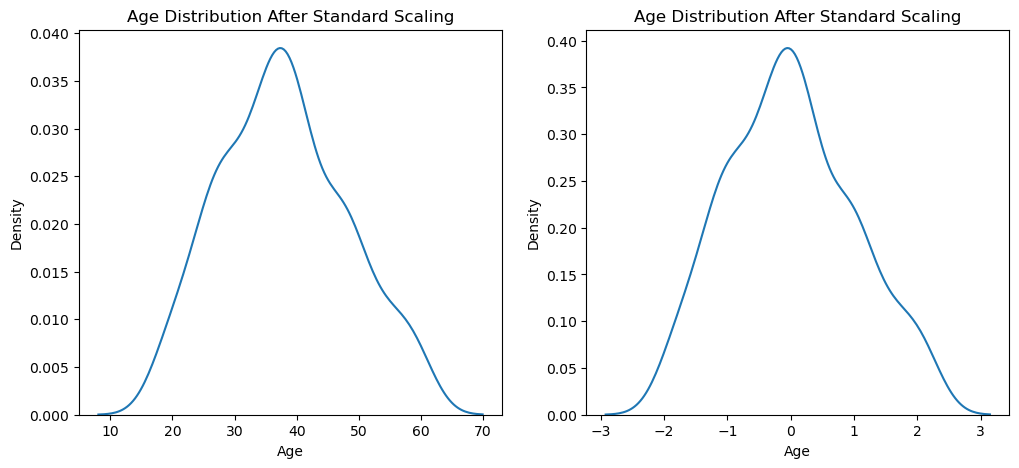

In [33]:
fig, (ax1, ax2)= plt.subplots(ncols=2, figsize=(12,5))

ax1.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train['Age'], ax=ax1)

#after scaling the distribution of the dataset is same so
ax2.set_title('Age Distribution After Standard Scaling')
sns.kdeplot(X_train_scaled["Age"], ax=ax2)

plt.show()

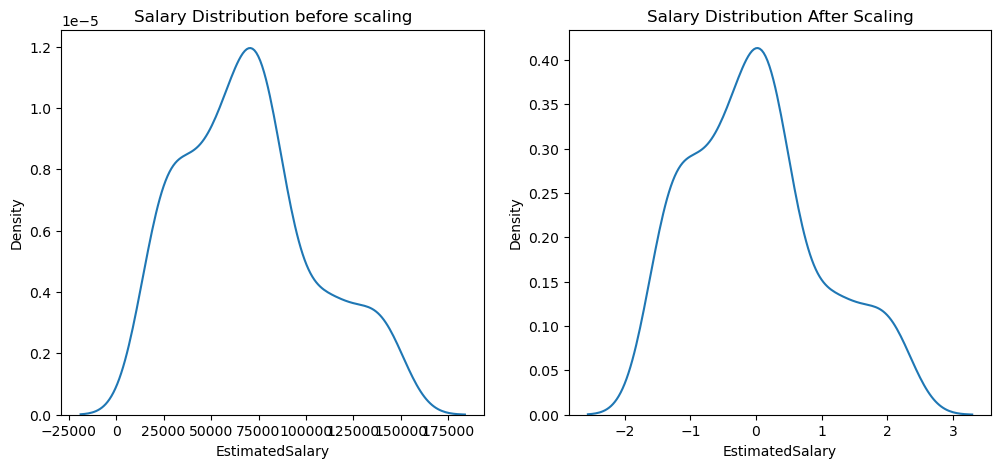

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols =2 , figsize=(12,5))

ax1.set_title('Salary Distribution before scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)


ax2.set_title('Salary Distribution After Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)


plt.show()

In [36]:
from sklearn.linear_model import LogisticRegression

In [37]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [39]:
lr.fit(X_train, Y_train)
lr_scaled.fit(X_train_scaled, Y_train)

LogisticRegression()

In [40]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [41]:
from sklearn.metrics import accuracy_score

In [45]:
print('Actual', accuracy_score(Y_test, y_pred))
print('Scaled', accuracy_score(Y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667


In [46]:
from sklearn.tree import DecisionTreeClassifier

In [47]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [48]:
dt.fit(X_train, Y_train)
dt_scaled.fit(X_train_scaled, Y_train)

DecisionTreeClassifier()

In [57]:
y_pred = dt.predict(X_test, Y_train)
y_pred_scaled = dt_scaled.fit(X_test_scaled, Y_train)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [51]:
print("Actual", accuracy_score(Y_test, y_pred))
print('Scaled', accuracy_score(Y_test, y_pred_scaled))

Actual 0.6583333333333333
Scaled 0.8666666666666667
